In [1]:
import numpy as np
import numpy.random as r
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("hotel_bookings.csv")
N = df.shape[0]
k = df.shape[1]
df.shape

(119390, 32)

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Booking Number Distribution

In [25]:
month = {'April':4,
 'August':8,
 'December':12,
 'February':2,
 'January':1,
 'July':7,
 'June':6,
 'March':3,
 'May':5,
 'November':11,
 'October':10,
 'September':9}

In [26]:
dates = df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number']]
dates

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date_week_number
0,2015,July,1,27
1,2015,July,1,27
2,2015,July,1,27
3,2015,July,1,27
4,2015,July,1,27
...,...,...,...,...
119385,2017,August,30,35
119386,2017,August,31,35
119387,2017,August,31,35
119388,2017,August,31,35


In [27]:
# Separate years
y2015 = dates[dates.arrival_date_year == 2015]
y2016 = dates[dates.arrival_date_year == 2016]
y2017 = dates[dates.arrival_date_year == 2017]

In [28]:
# Count month+year booking numbers using dictionary
D2015 = {}
for mon in y2015.arrival_date_month:
    if month[mon] in D2015:
        D2015[month[mon]] += 1
    else:
        D2015[month[mon]] = 1
D2015

{7: 2776, 8: 3889, 9: 5114, 10: 4957, 11: 2340, 12: 2920}

In [29]:
D2016 = {}
for mon in y2016.arrival_date_month:
    if month[mon] in D2016:
        D2016[month[mon]] += 1
    else:
        D2016[month[mon]] = 1
D2016

{1: 2248,
 2: 3891,
 3: 4824,
 4: 5428,
 5: 5478,
 6: 5292,
 7: 4572,
 8: 5063,
 9: 5394,
 10: 6203,
 11: 4454,
 12: 3860}

In [30]:
D2017 = {}
for mon in y2017.arrival_date_month:
    if month[mon] in D2017:
        D2017[month[mon]] += 1
    else:
        D2017[month[mon]] = 1
D2017

{1: 3681, 2: 4177, 3: 4970, 4: 5661, 5: 6313, 6: 5647, 7: 5313, 8: 4925}

In [35]:
# Prepare for plotting

booking_num = []
for i in range(1,13):
    if i in D2015:
        booking_num.append(D2015[i])
for i in range(1,13):
    if i in D2016:
        booking_num.append(D2016[i])   
for i in range(1,13):
    if i in D2017:
        booking_num.append(D2017[i])
        
month_names = []
for i in range(7,13):
    month_names.append(str(i)+'/'+'15')
for i in range(1,13):
    month_names.append(str(i)+'/'+'16')    
for i in range(1,9):
    month_names.append(str(i)+'/'+'17')
    
#month_names

<BarContainer object of 26 artists>

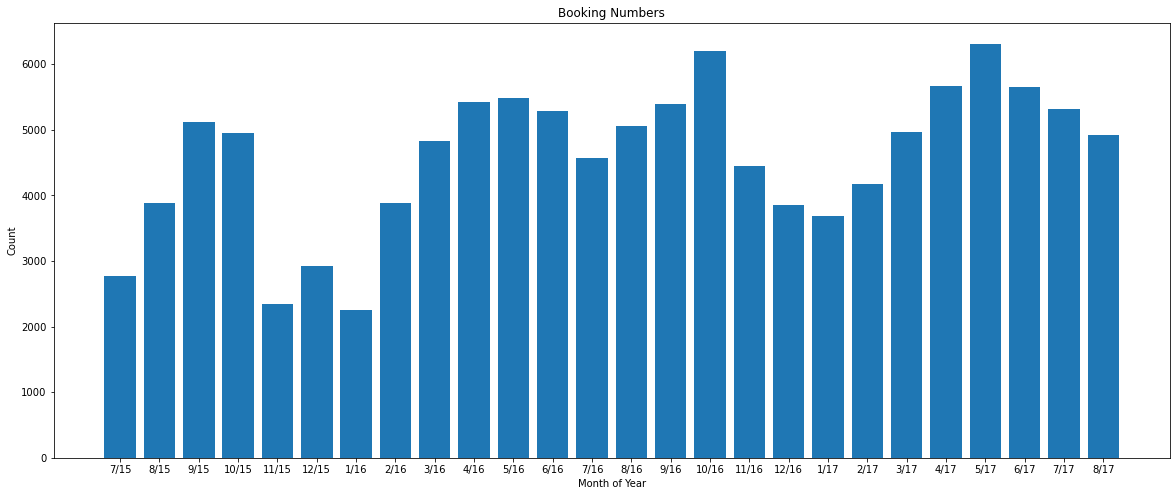

In [59]:
plt.figure(figsize = (20,8))
plt.title("Booking Numbers")
plt.xlabel("Month of Year")
plt.ylabel("Count")
plt.bar(month_names,booking_num)

## Country Distribution

In [62]:
countries = df.country
countries

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [63]:
countryDict = {}

for c in countries:
    if c in countryDict:
        countryDict[c] += 1
    else:
        countryDict[c] = 1

In [103]:
country_count = []
for k in countryDict:
    country_count.append([countryDict[k],k])
country_count.sort(reverse=True)
country_count[:7]

[[48590, 'PRT'],
 [12129, 'GBR'],
 [10415, 'FRA'],
 [8568, 'ESP'],
 [7287, 'DEU'],
 [3766, 'ITA'],
 [3375, 'IRL']]

In [118]:
# Prepare for plotting
pie_values = []
pie_names = []
for item in country_count[:5]:
    pie_values.append(item[0])
    pie_names.append(item[1])

others = df.shape[0]-sum(pie_values)
pie_values.append(others)
pie_names.append('Others')

Text(0.5, 1.0, 'Country Distribution')

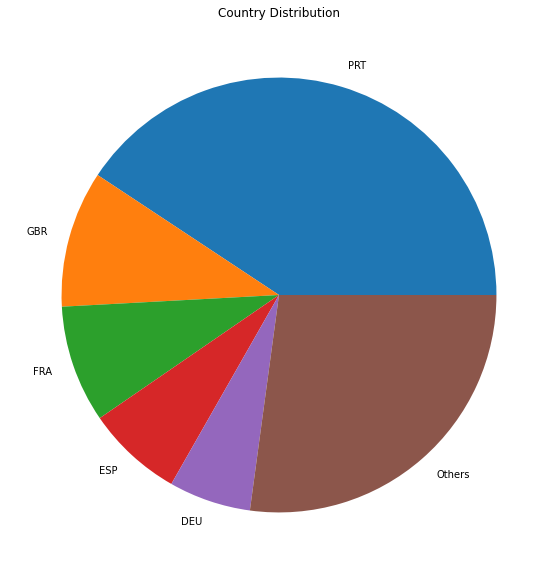

In [125]:
plt.figure(figsize = (10,10))
plt.pie(pie_values, labels=pie_names)
plt.title("Country Distribution")